In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

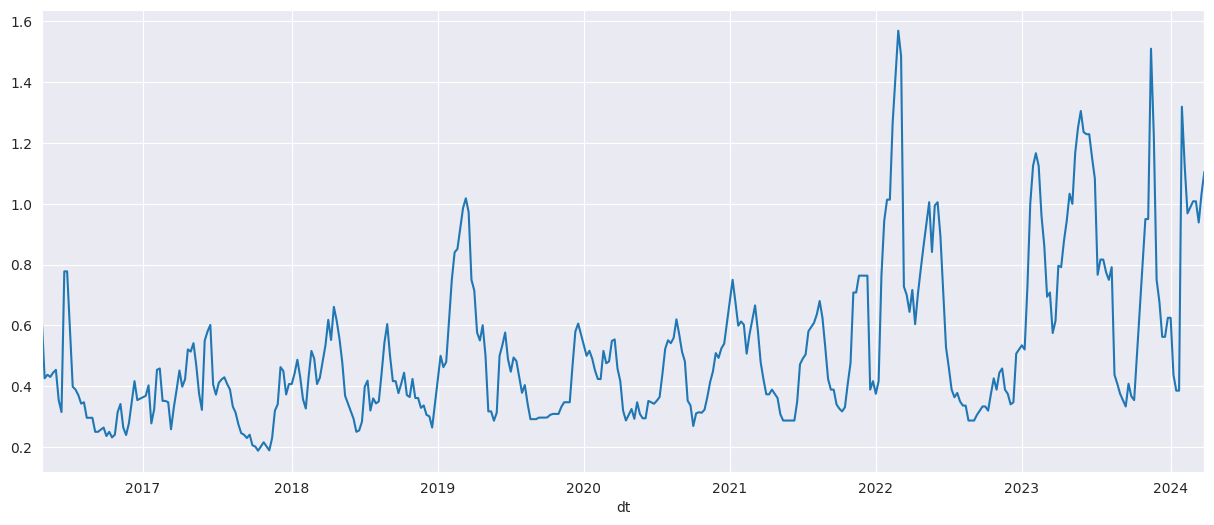

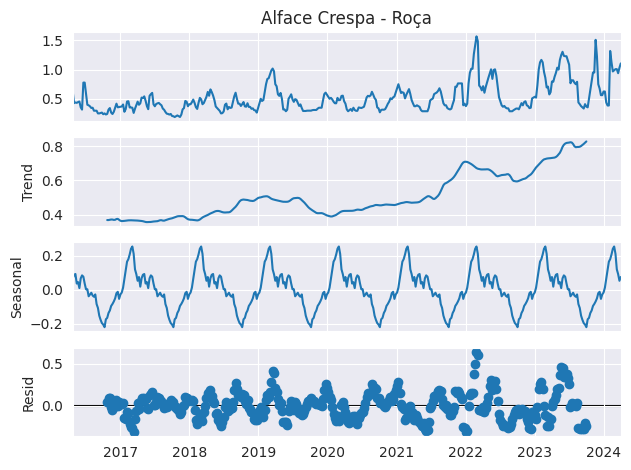

In [69]:
price_df = pd.read_csv('../processed_data/prices-2016-2024.csv')
price_df.set_index('dt', inplace=True)
price_df.index = pd.to_datetime(price_df.index)
price_df = price_df.resample('W').mean()
price_df = price_df.interpolate(method='linear')
price_df['Alface Crespa - Roça'].plot(figsize=(15,6))
plt.show()

res = sm.tsa.seasonal_decompose(price_df['Alface Crespa - Roça'])
res.plot()
plt.show()

In [70]:

weather_df = pd.read_csv('../processed_data/weather_2016_2023.csv')
weather_df.set_index('dt', inplace=True)
weather_df.index = pd.to_datetime(weather_df.index, utc=True)
weather_df.replace(-9999, None, inplace=True)
resampled_weather_df = weather_df.resample('W').mean()

transformations = {
    'default': {
        'description': 'resample_weekly_mean',
        'transform': lambda x: x.resample('W').mean()
        },
    'RADIACAO GLOBAL (Kj/m²)': [{
        'description': 'resample_weekly_max',
        'transform': lambda x: x.resample('W').max()
        }],
    }

In [71]:
for col in weather_df.columns:
    if col in transformations:
        resampled_weather_df[col] = transformations[col][0]['transform'](weather_df[col])
    else:
        resampled_weather_df[col] = transformations['default']['transform'](weather_df[col])

In [72]:
def safe_filename(filename):
    keepcharacters = (' ','.','_')
    return "".join(c for c in filename if c.isalnum() or c in keepcharacters).rstrip()

/tmp/ipykernel_63913/3901793799.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, figsize=(15,8))


ValueError: This function does not handle missing values

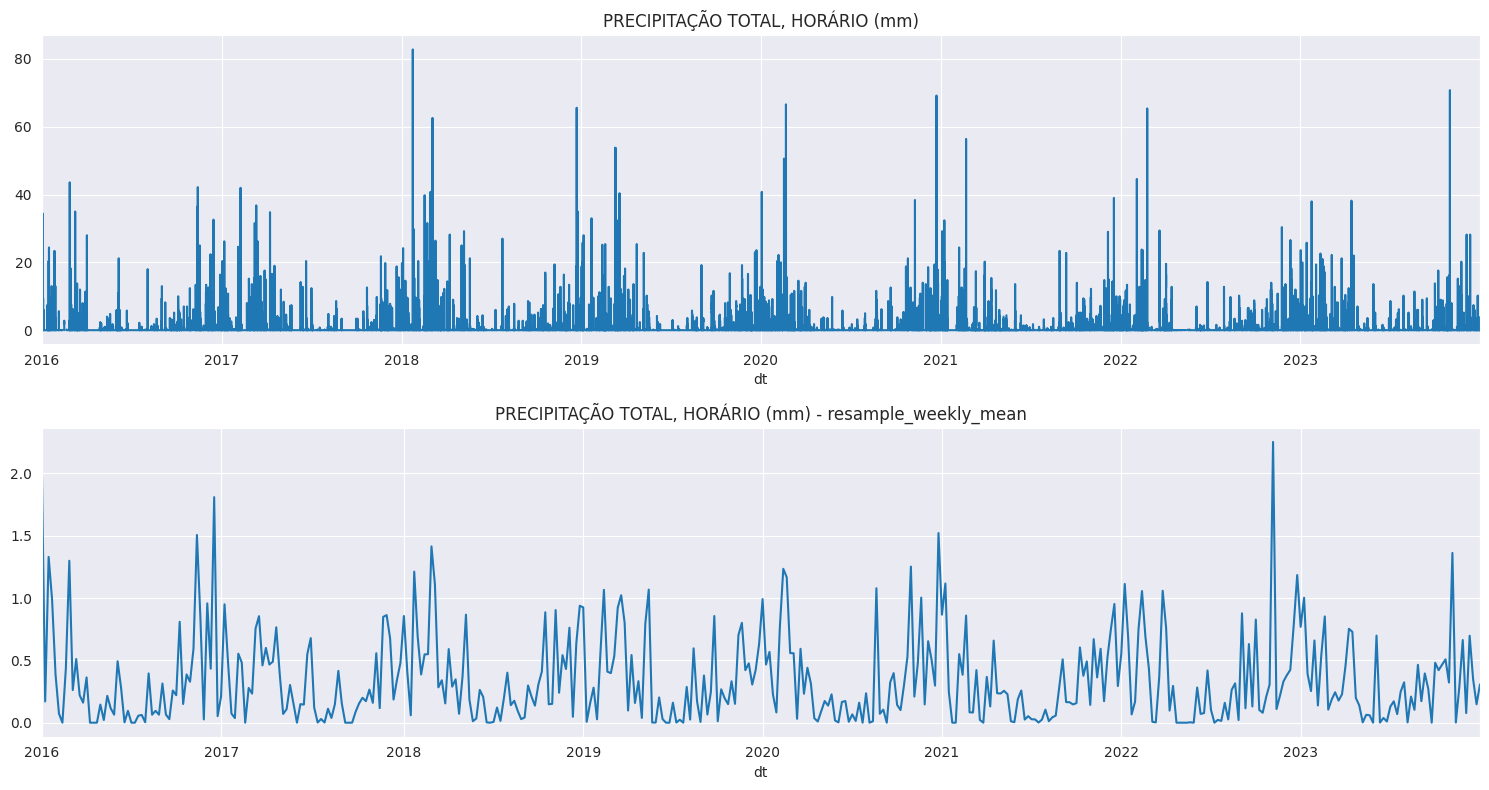

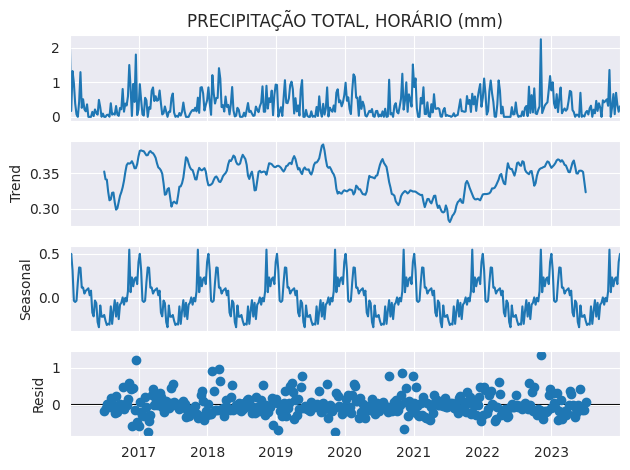

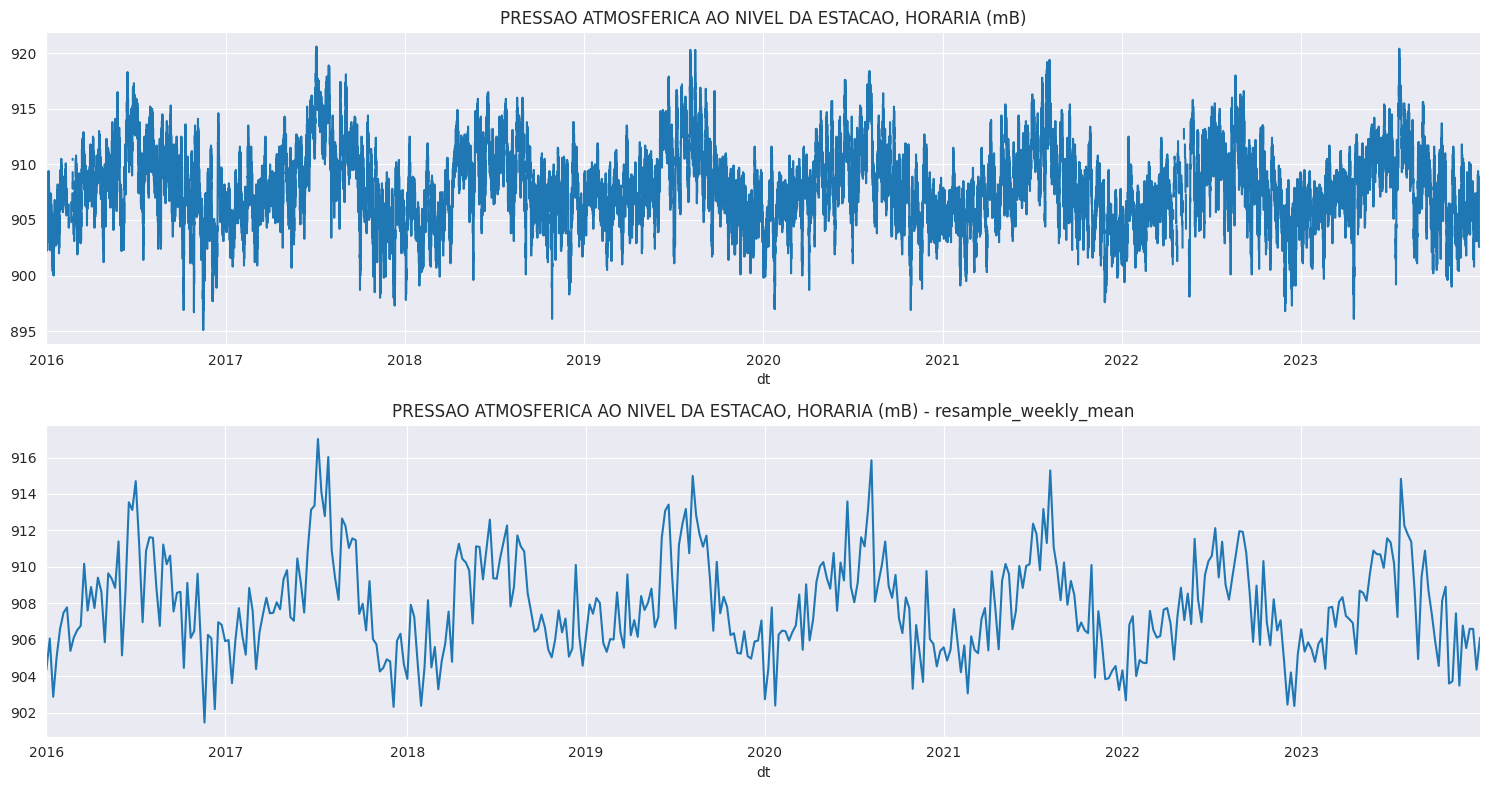

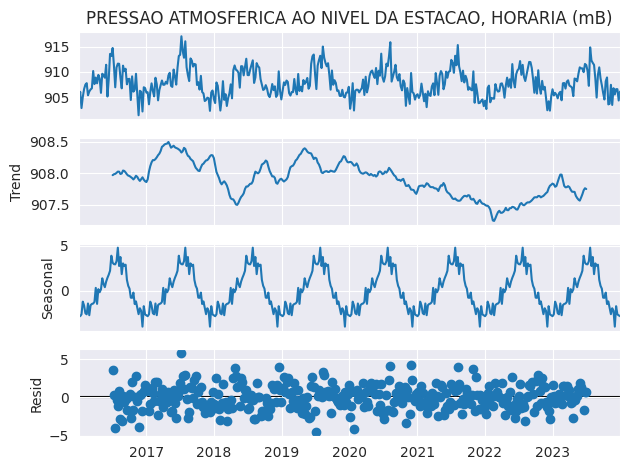

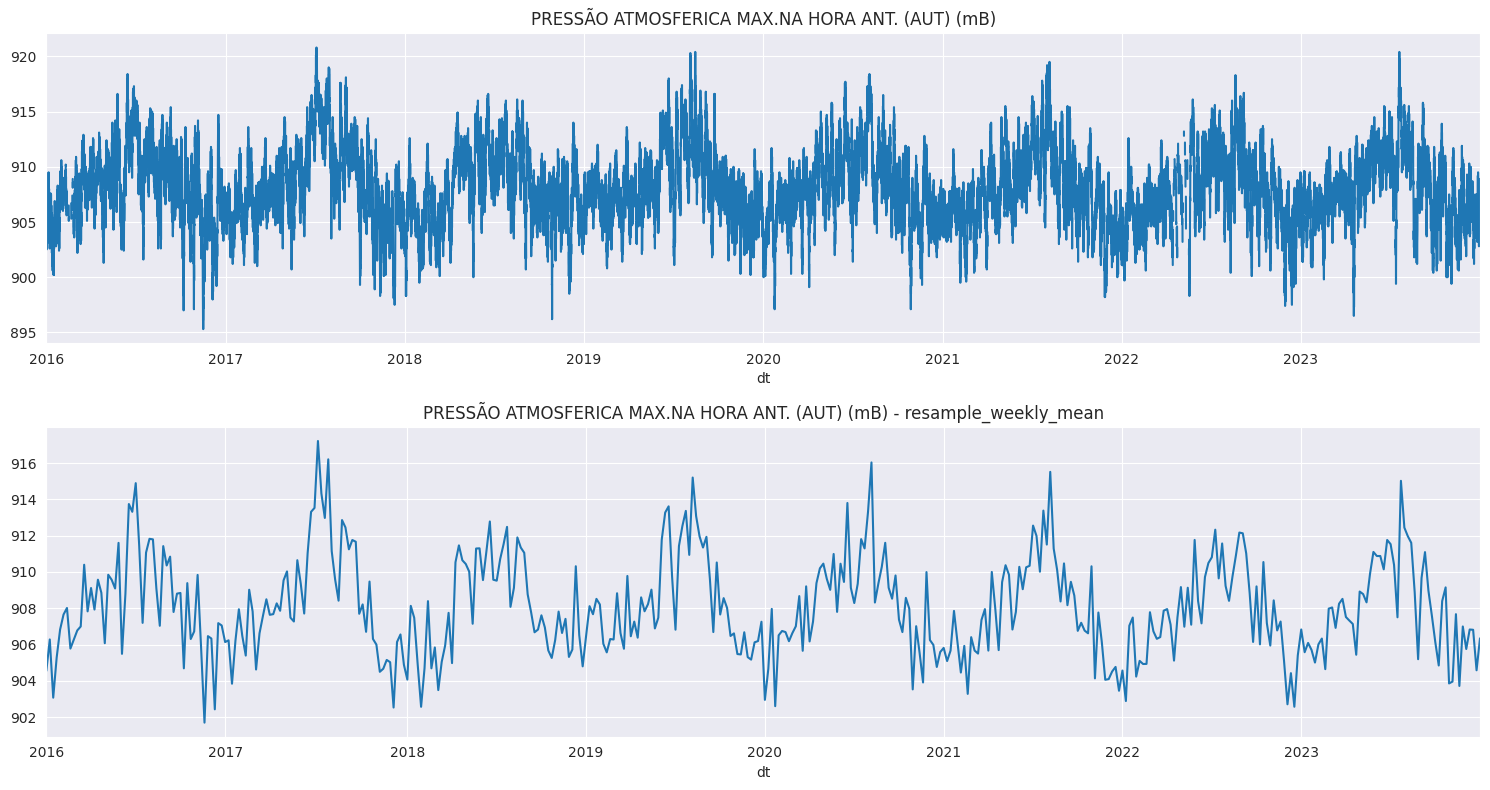

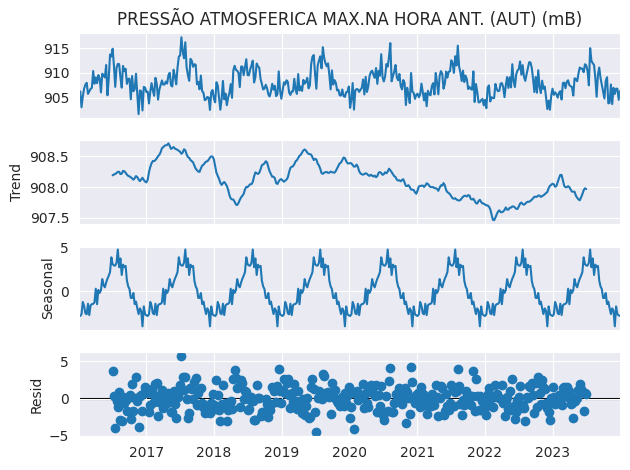

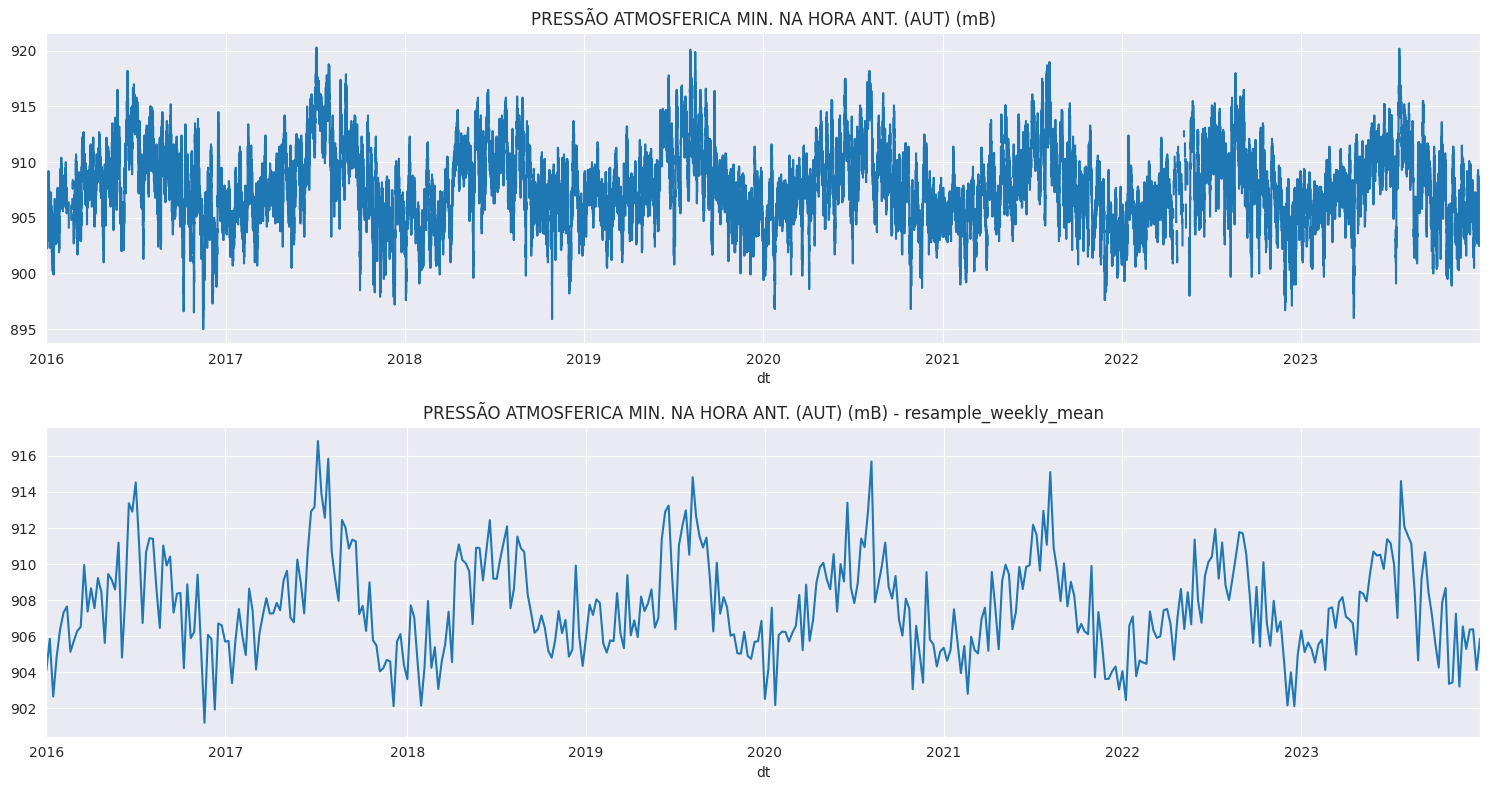

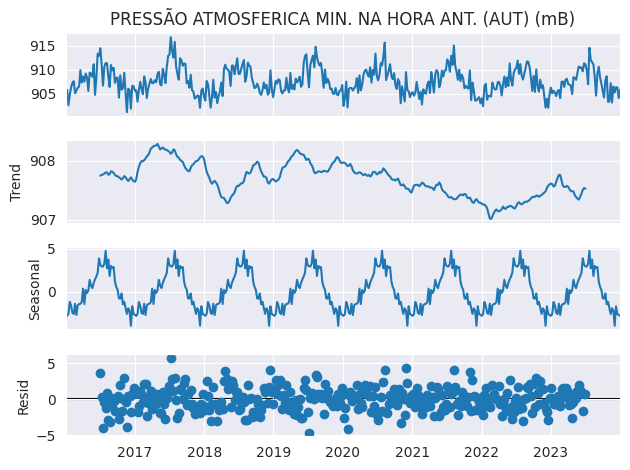

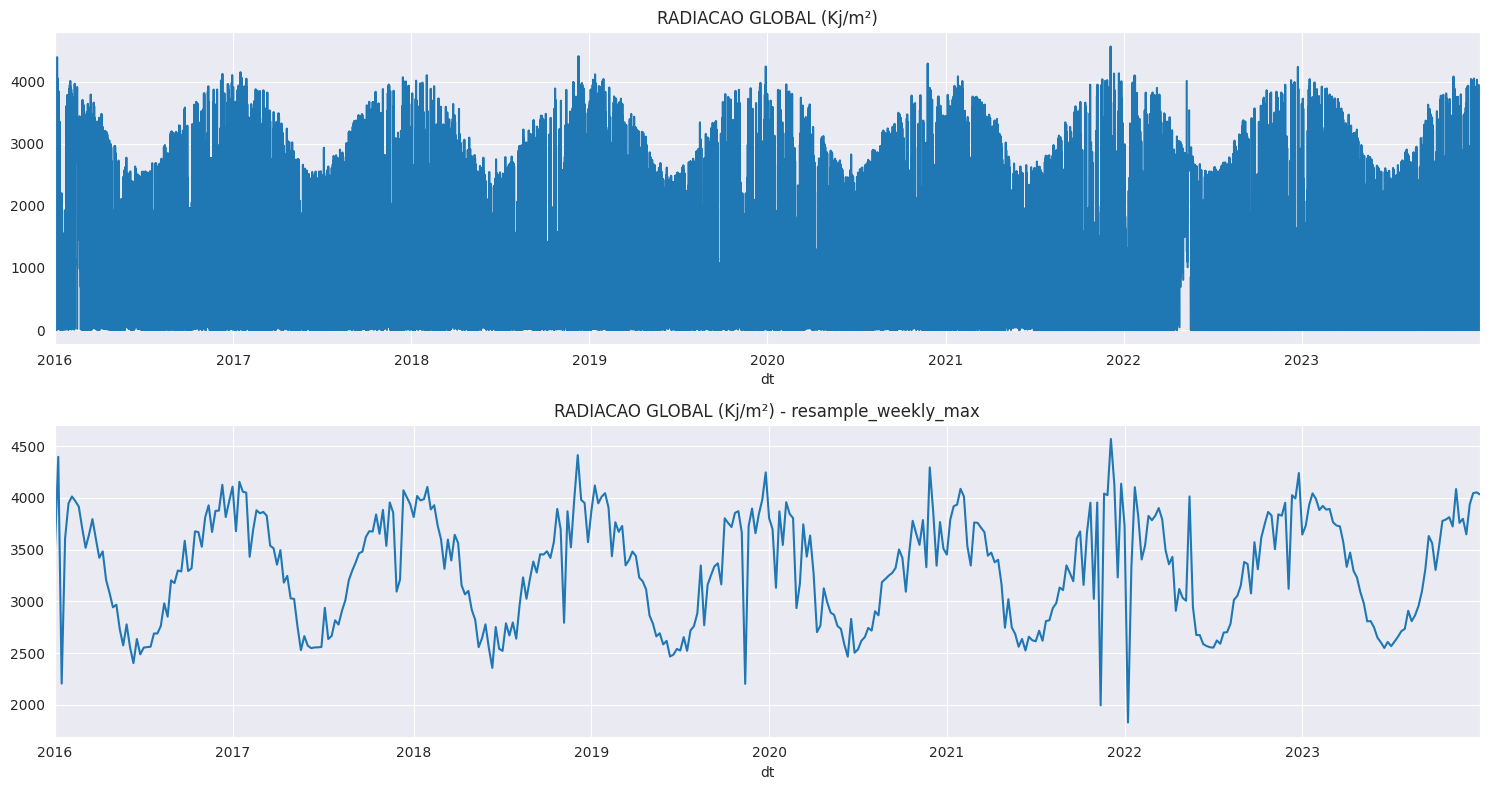

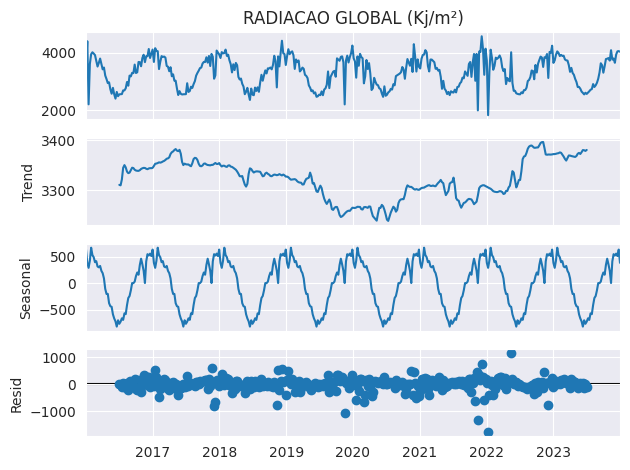

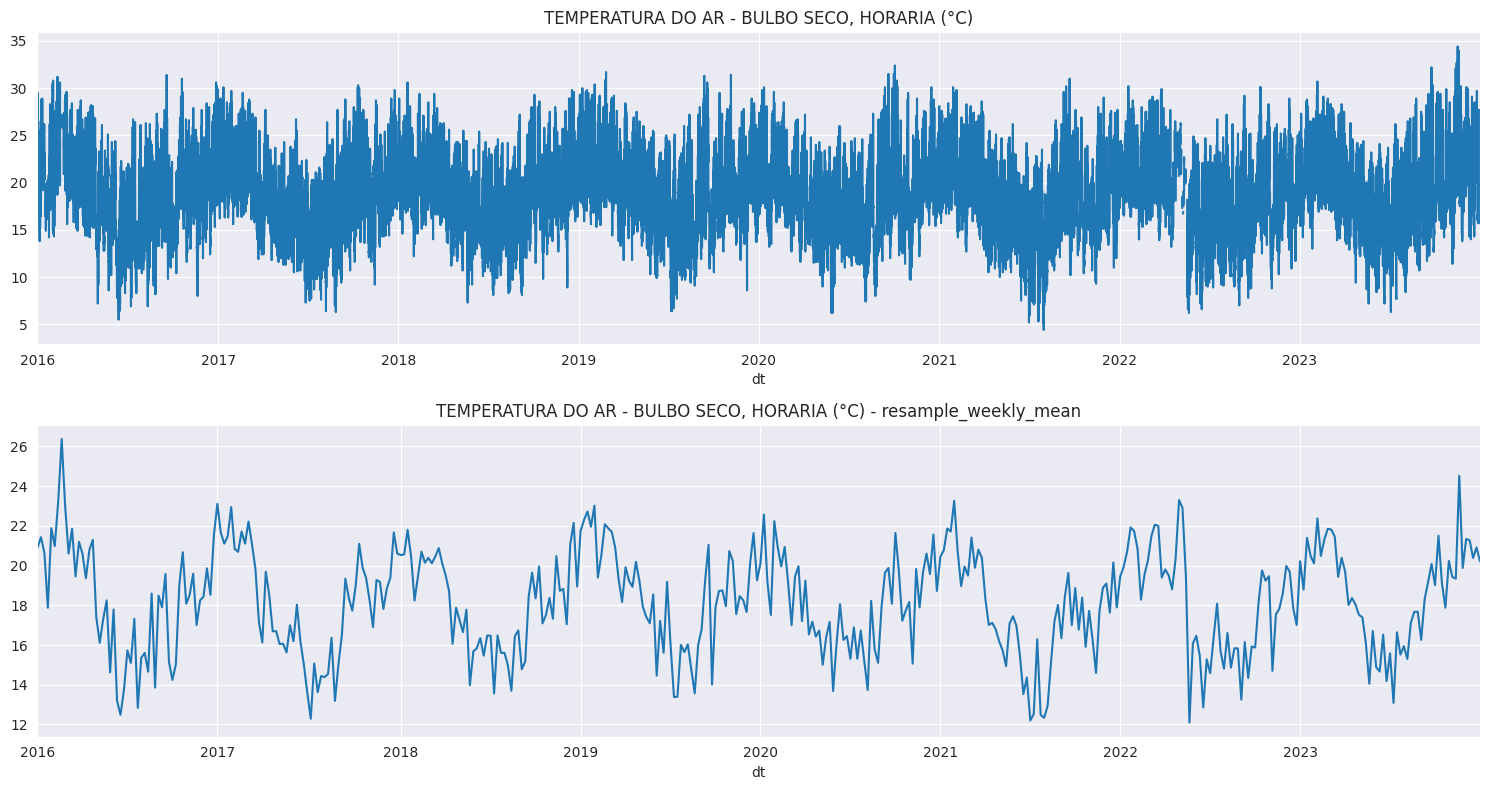

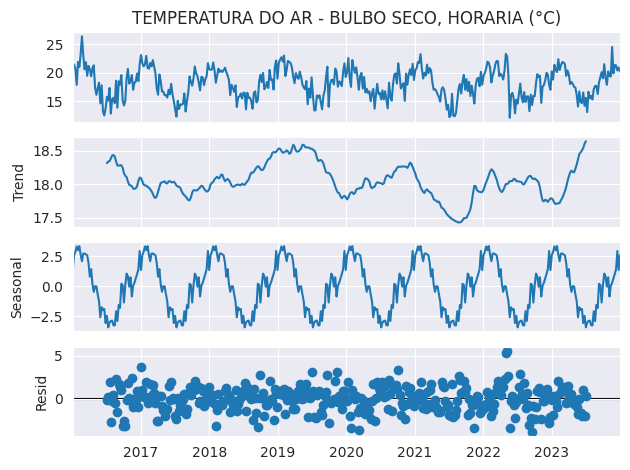

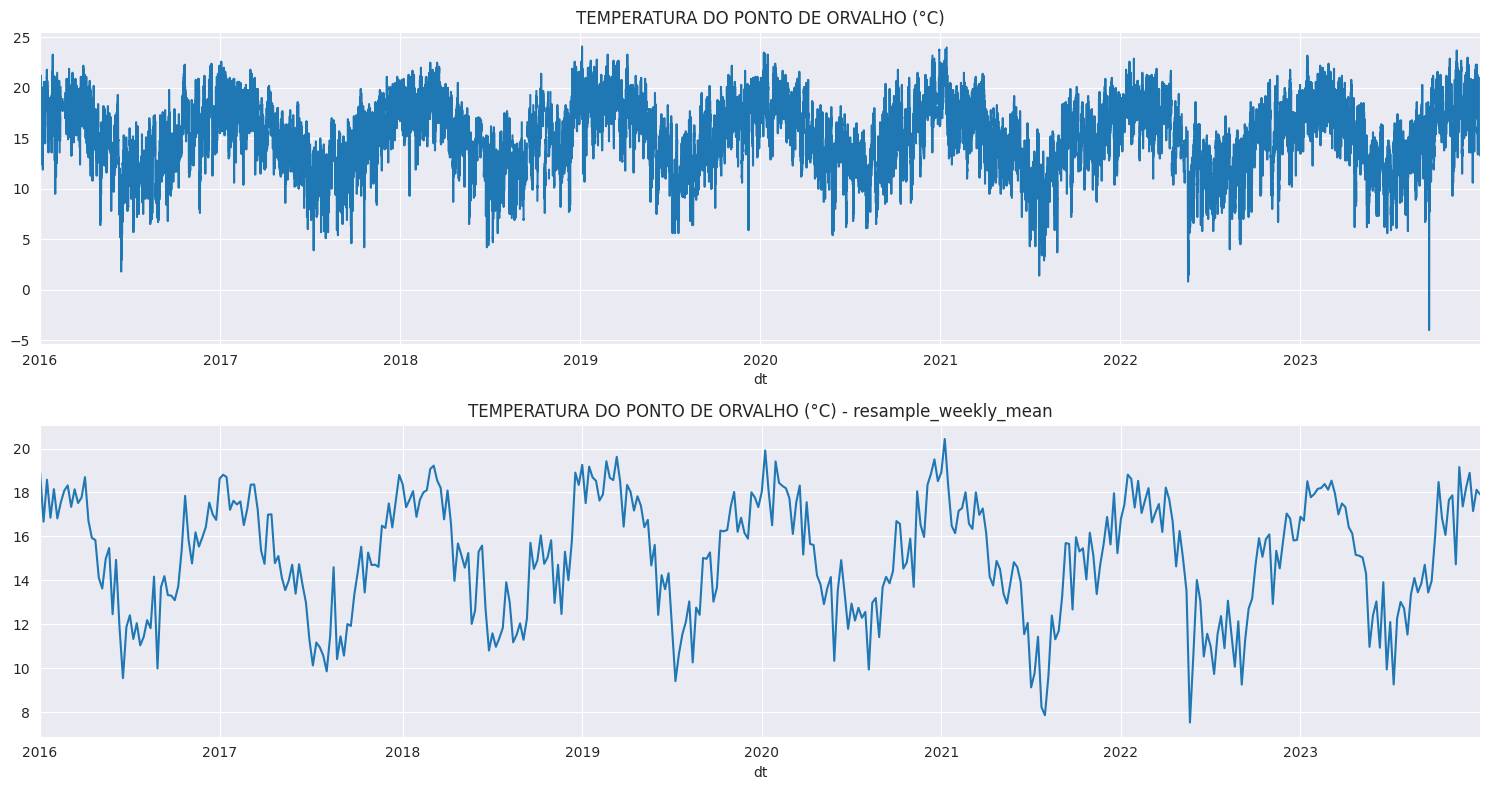

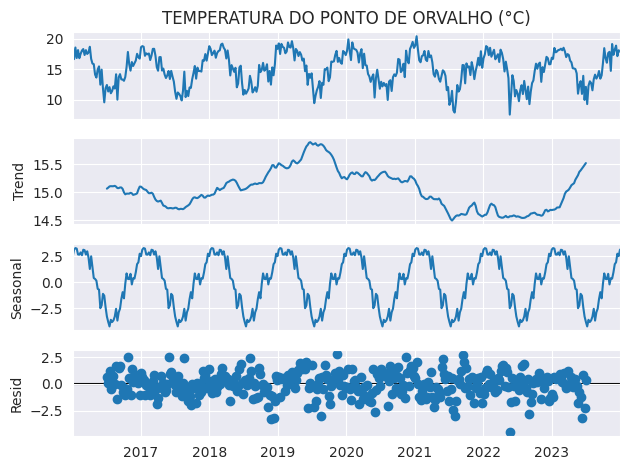

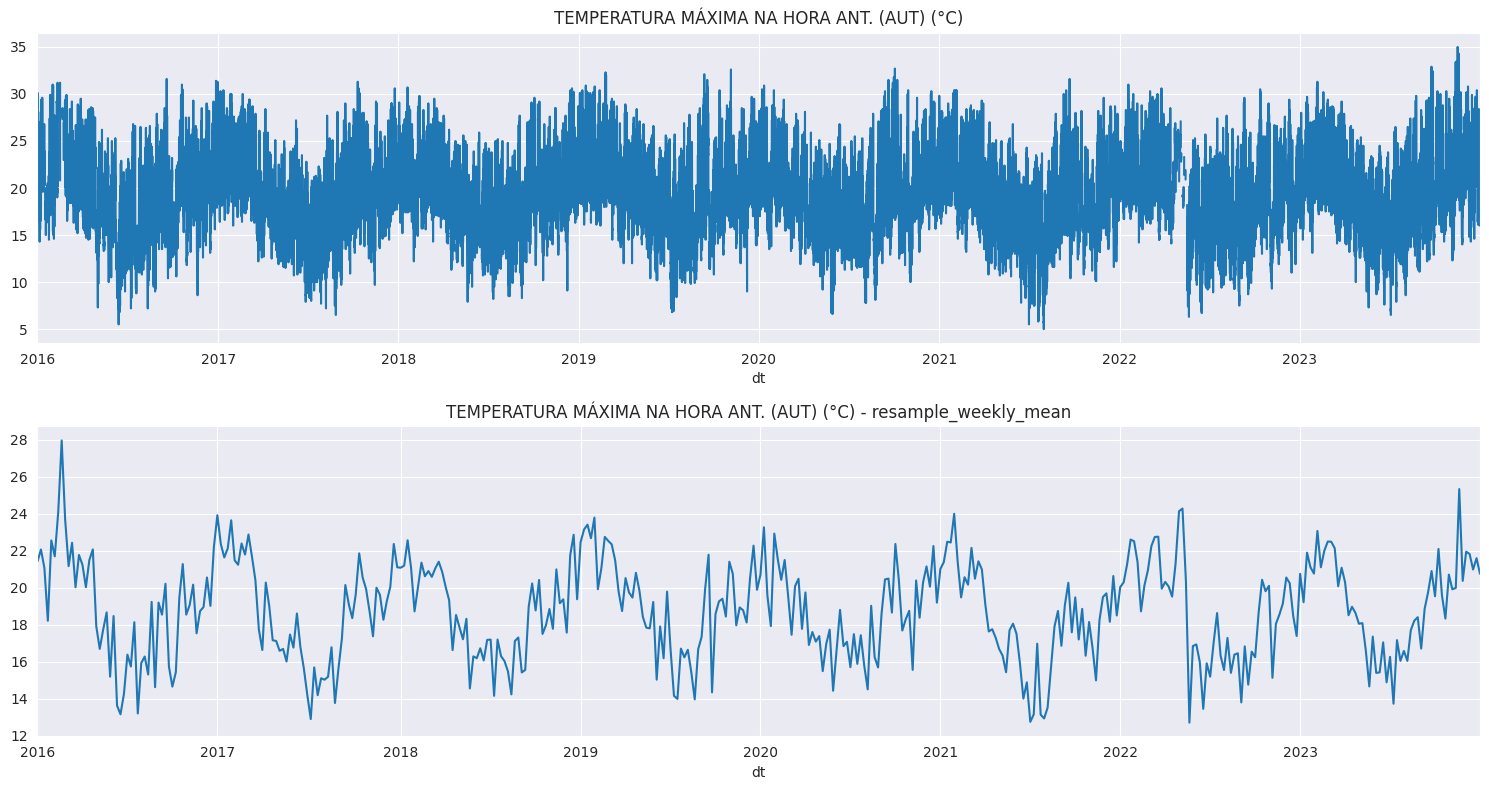

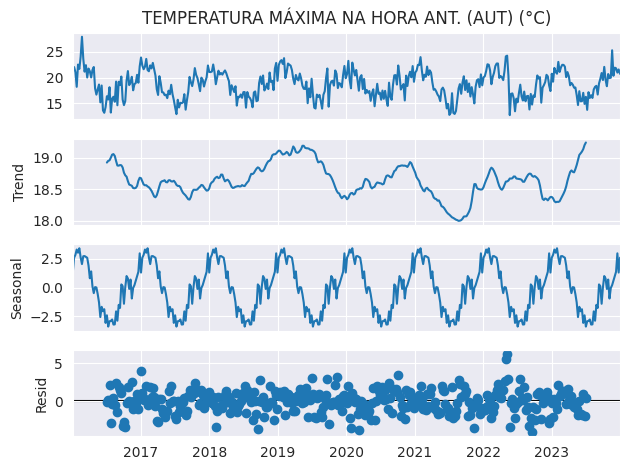

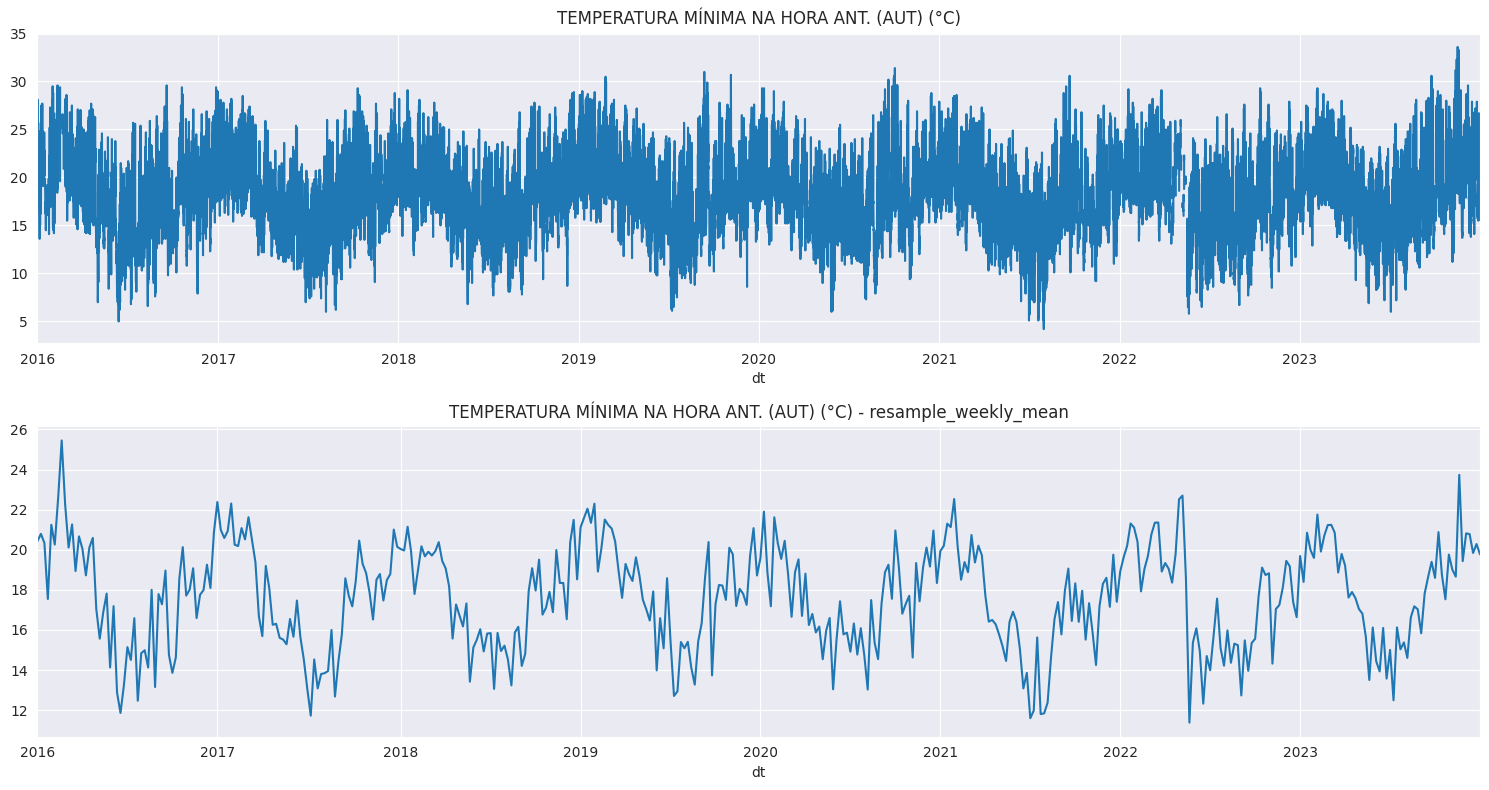

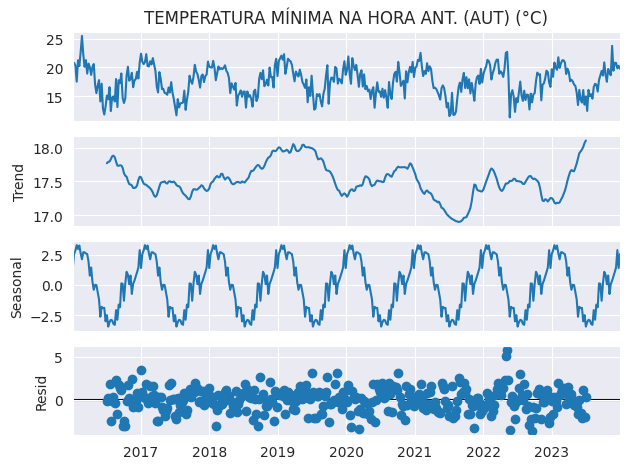

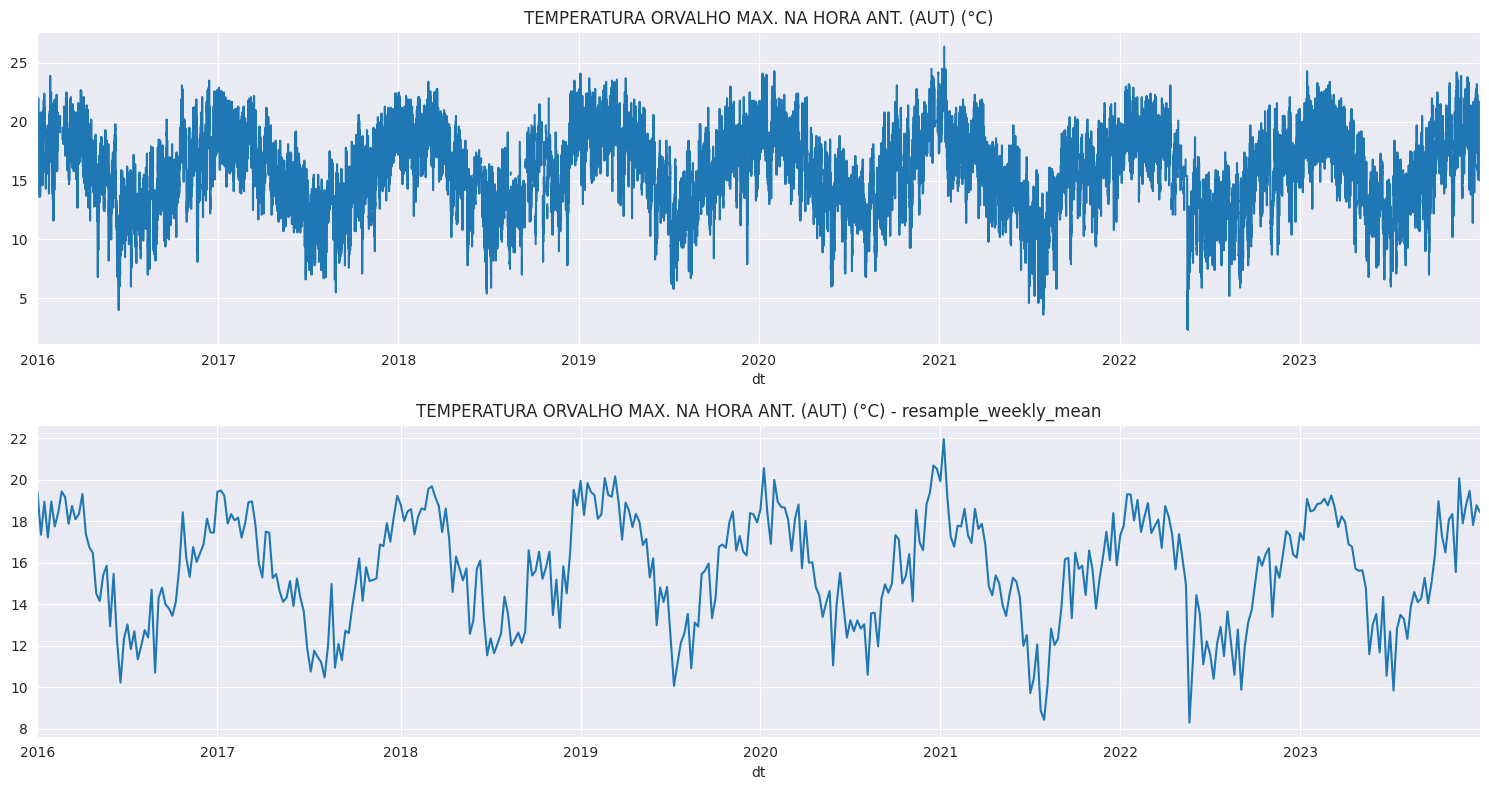

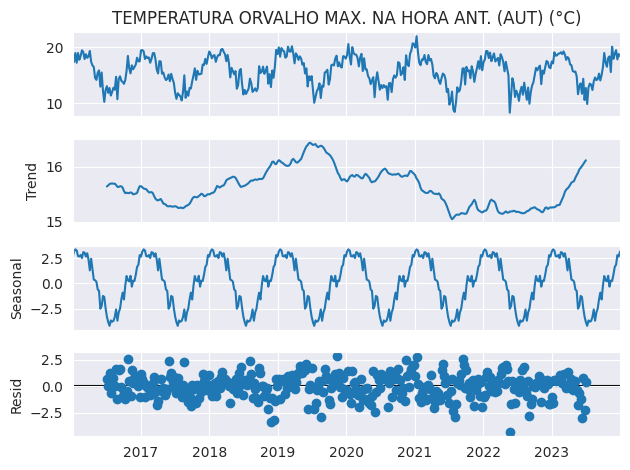

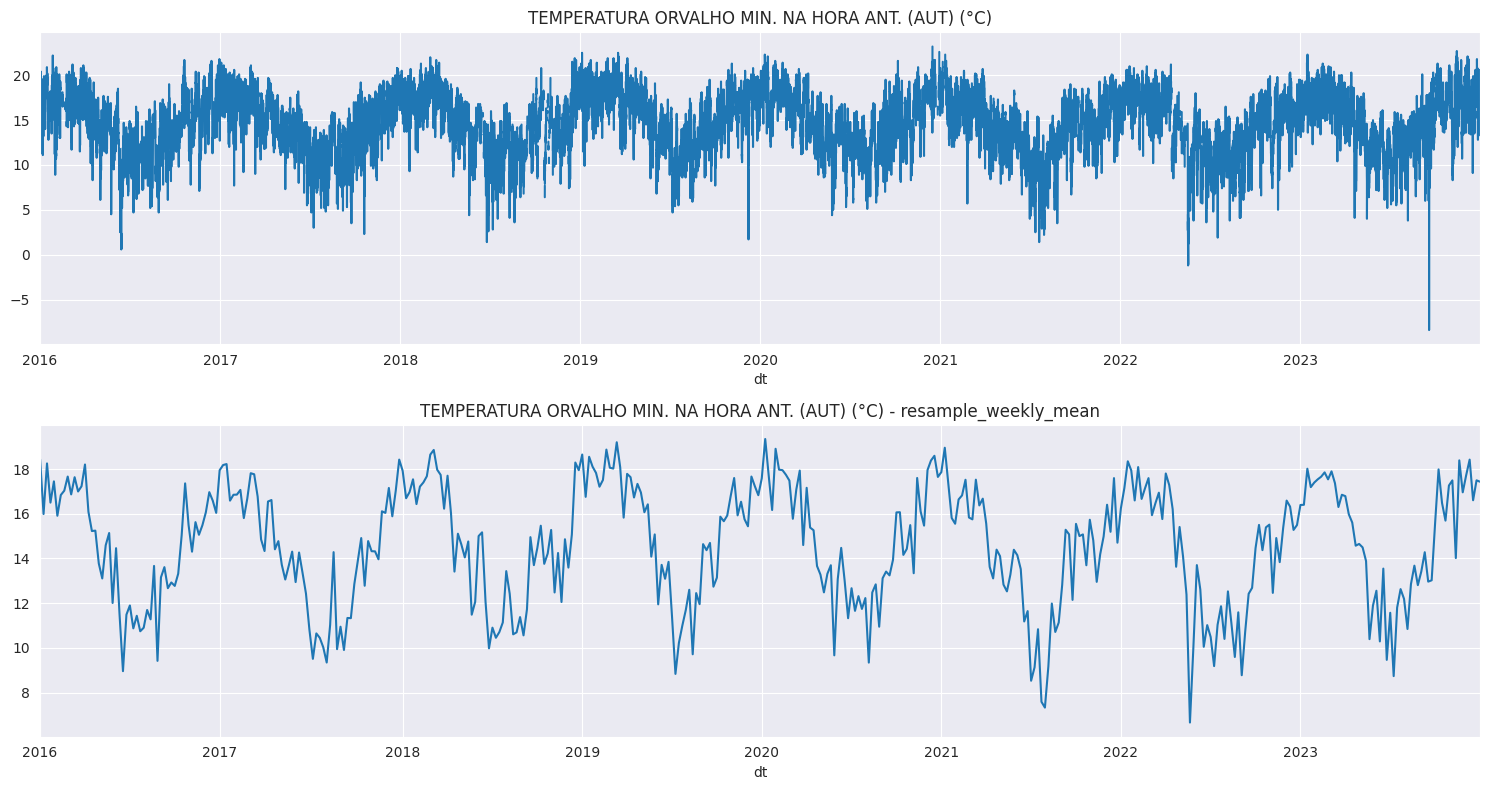

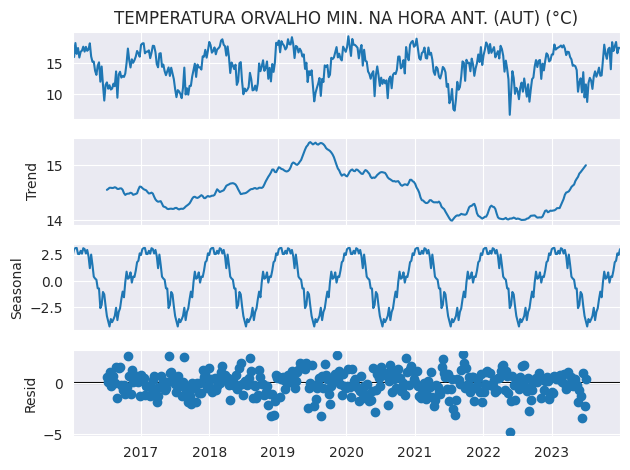

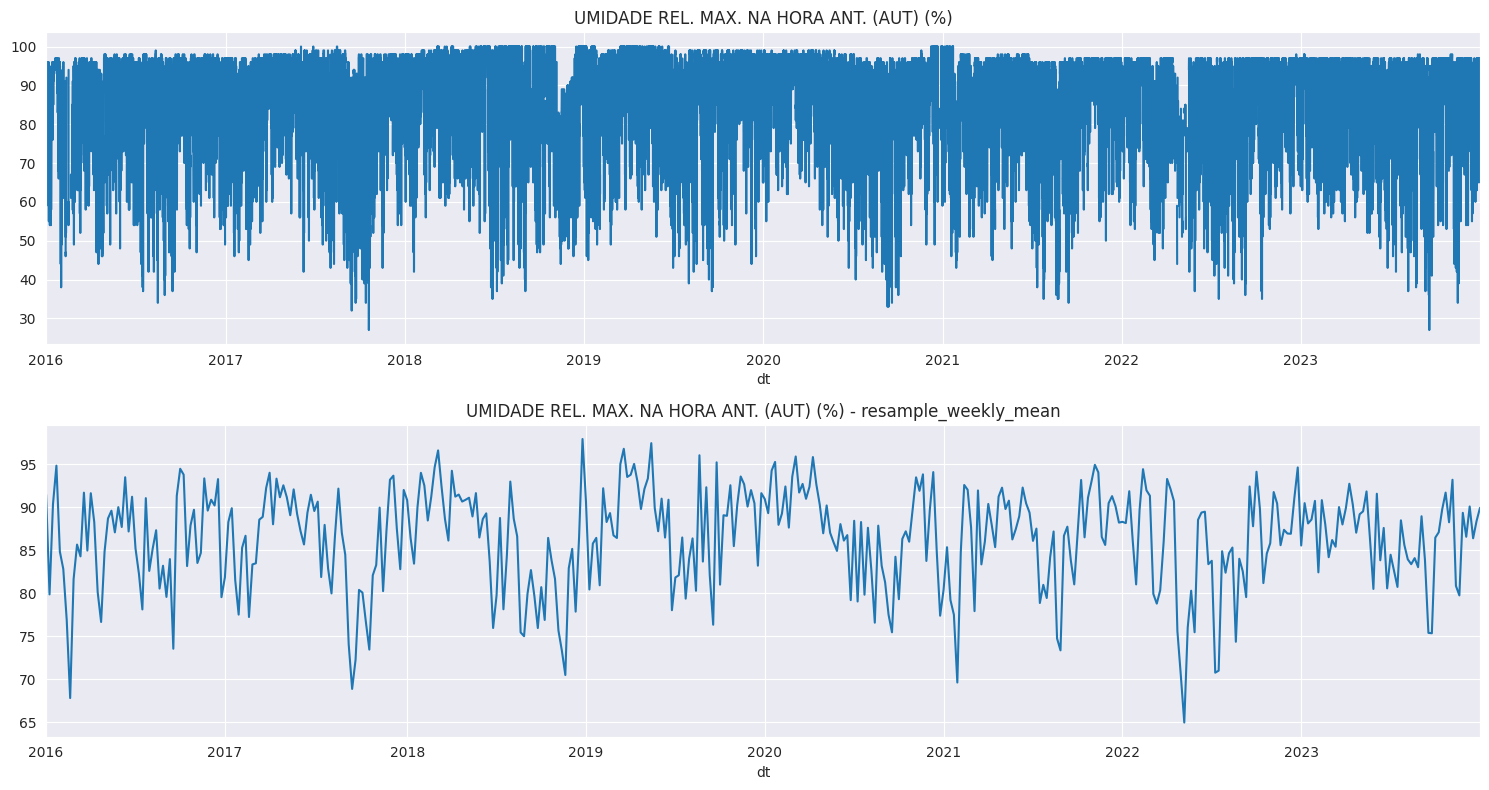

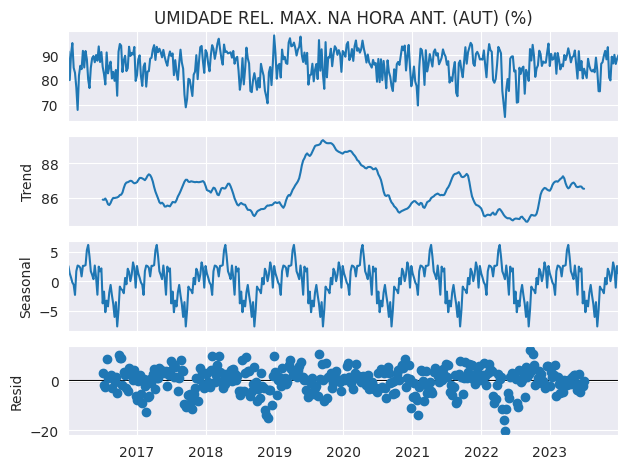

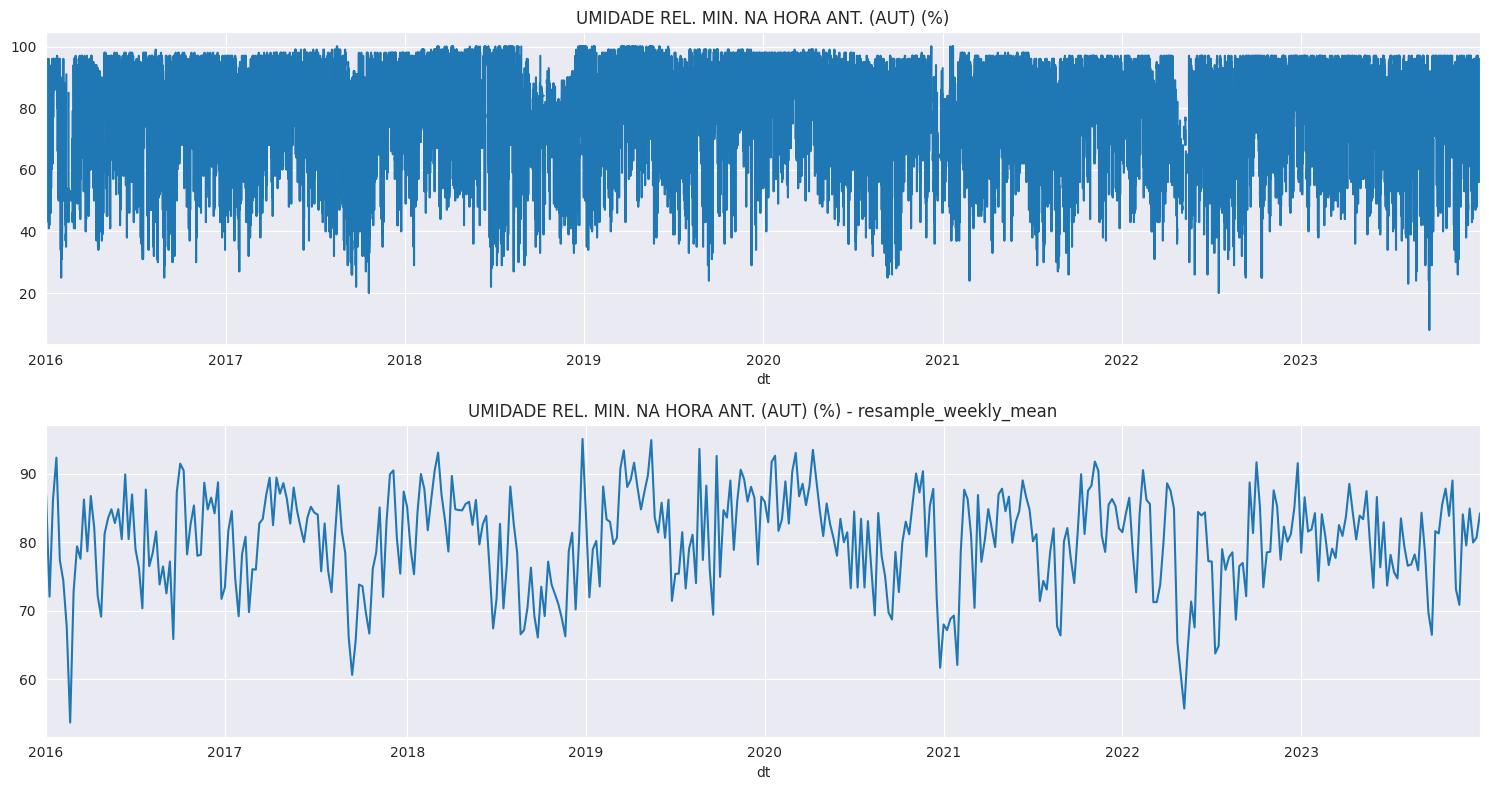

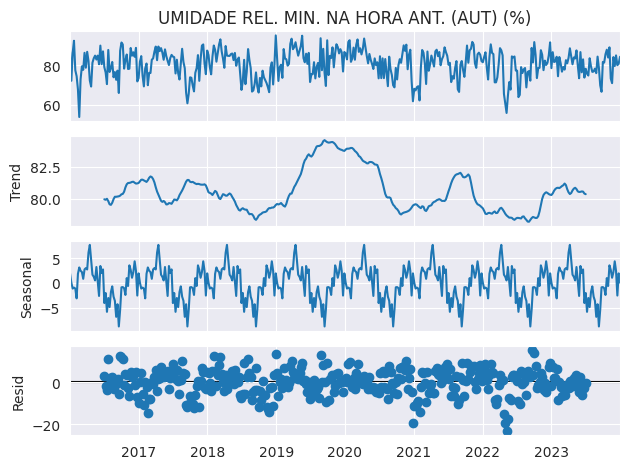

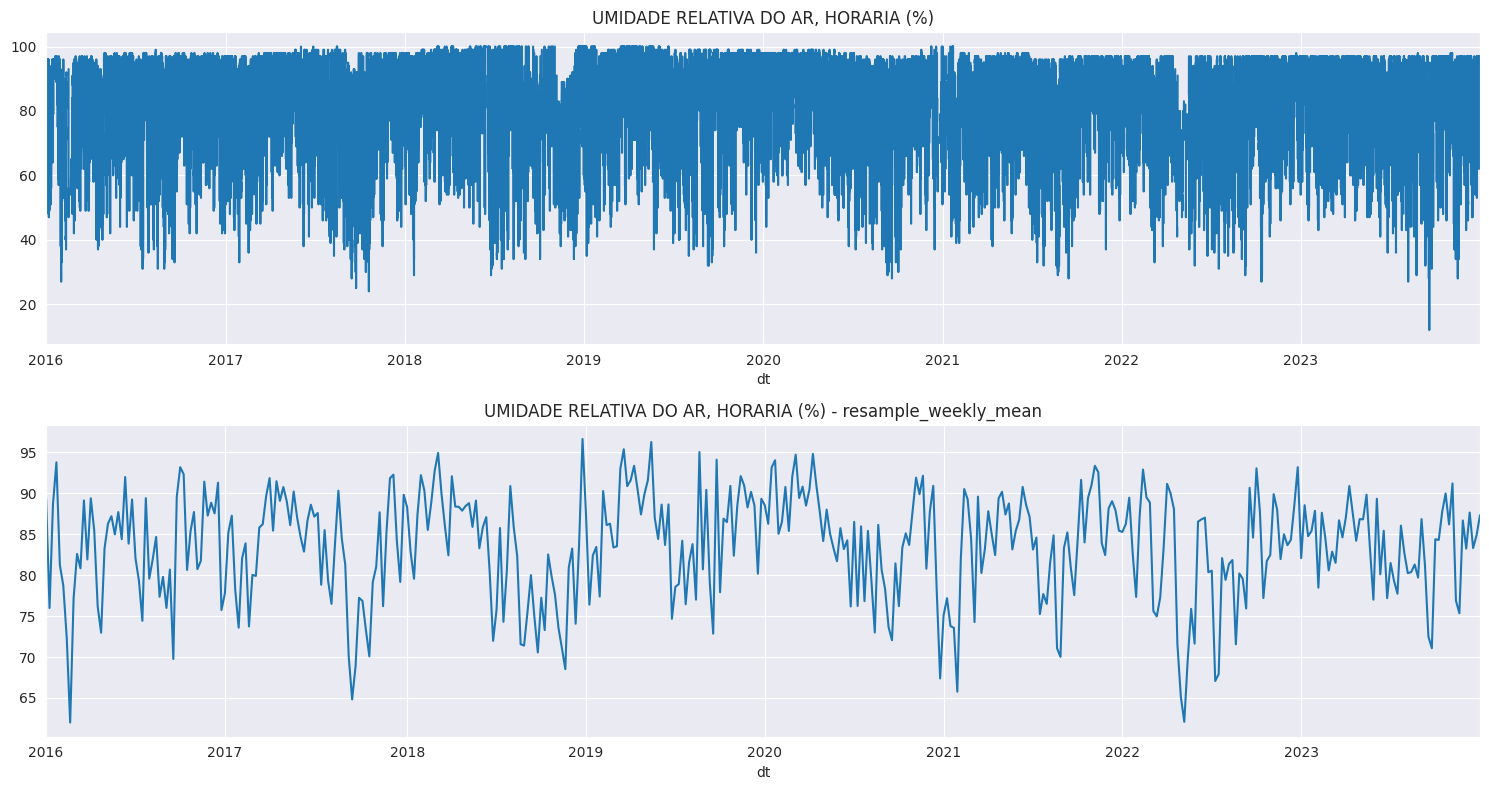

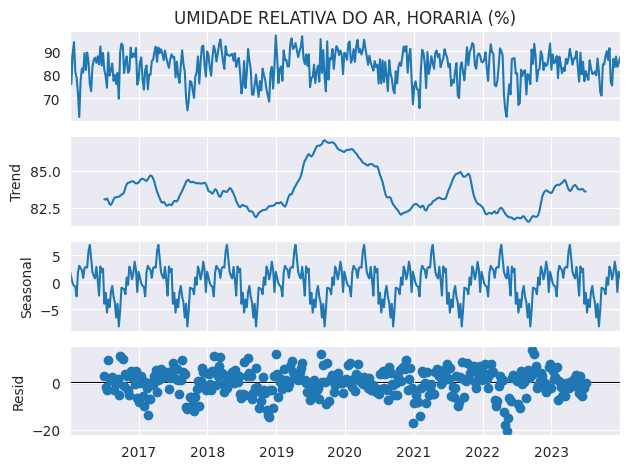

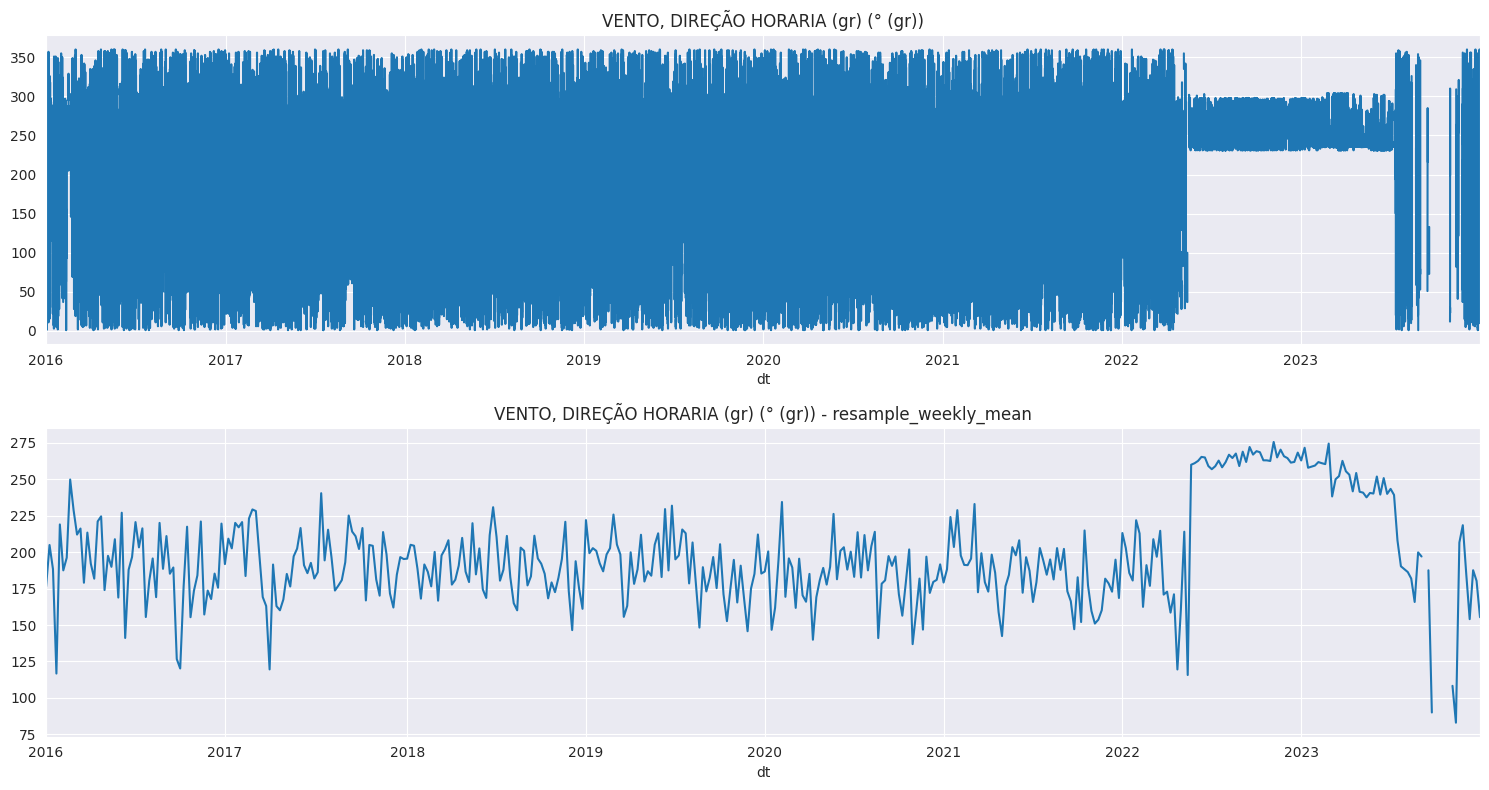

In [74]:


for col in resampled_weather_df.columns:
    fig, axs = plt.subplots(2, figsize=(15,8))
    weather_df[col].plot(ax=axs[0])  
    transformation = transformations[col][0]['description'] if col in transformations else transformations['default']['description']
    resampled_weather_df[col].plot(ax=axs[1])  
    axs[0].set_title(col)  
    axs[1].set_title(f'{col} - {transformation}') 
    plt.tight_layout() 
    plt.savefig(f'2024-05-01-time-series-study/{safe_filename(col)}.png')
    
    dec1 = sm.tsa.seasonal_decompose(resampled_weather_df[col])
    dec1.plot()
    plt.savefig(f'2024-05-01-time-series-study/decomposition-{safe_filename(col)}.png')
    plt.close()
    
    